In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 1.8227 - accuracy: 0.2409 - val_loss: 1.6961 - val_accuracy: 0.3123
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.5657 - accuracy: 0.3708 - val_loss: 1.4615 - val_accuracy: 0.3857
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.4025 - accuracy: 0.3985 - val_loss: 1.3673 - val_accuracy: 0.3905
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.3293 - accuracy: 0.4109 - val_loss: 1.3217 - val_accuracy: 0.4268
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.2722 - accuracy: 0.4379 - val_loss: 1.2797 - val_accuracy: 0.4340
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.2351 - accuracy: 0.4609 - val_loss: 1.2670 - val_accuracy: 0.4785
Epoch 7/10
1688/1688 [==============================] - 9s 6ms/step - loss: 1.2014 - accuracy: 0.4824 - val_loss: 1.2706 - val_accuracy

1875/1875 [==============================] - 5s 3ms/step


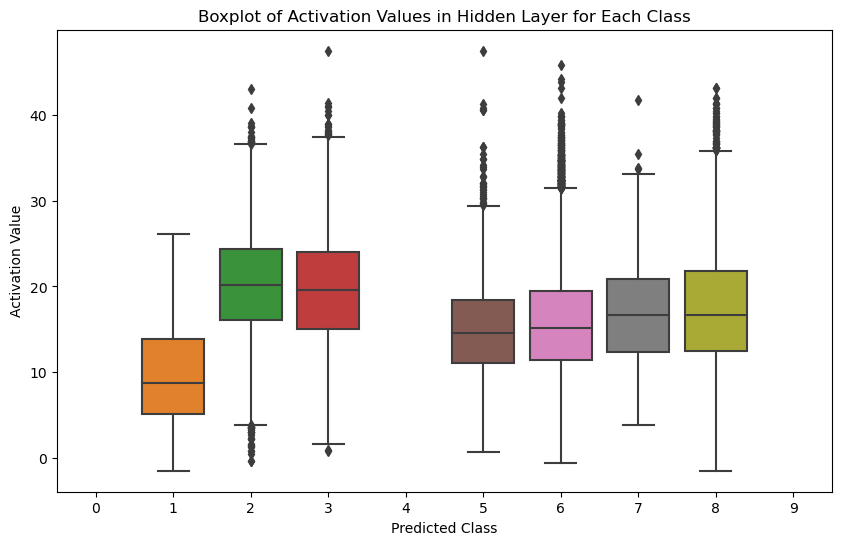

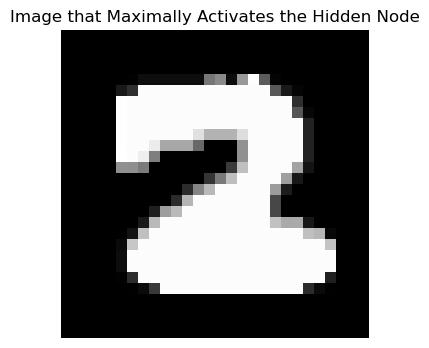

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(train_images)

hidden_layer_weights, hidden_layer_biases = model.layers[1].get_weights()
hidden_layer_activations = np.dot(train_images, hidden_layer_weights) + hidden_layer_biases

predicted_classes = np.argmax(predictions, axis=1)
activation_values_by_class = [hidden_layer_activations[predicted_classes == i].flatten() for i in range(10)]

plt.figure(figsize=(10, 6))
sns.boxplot(activation_values_by_class)
plt.title('Boxplot of Activation Values in Hidden Layer for Each Class')
plt.xlabel('Predicted Class')
plt.ylabel('Activation Value')
plt.show()

max_activation_index = np.argmax(hidden_layer_activations)
image_max_activation = train_images[max_activation_index].reshape(28, 28)

plt.figure(figsize=(4, 4))
plt.imshow(image_max_activation, cmap='gray')
plt.title('Image that Maximally Activates the Hidden Node')
plt.axis('off')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 3ms/step
[[   0    0    1    0    0    4  972    2    1    0]
 [   0 1074   49    6    0    2    0    0    4    0]
 [   0    1  904  103    0    5    6    0   13    0]
 [   0    0   22  939    0    2    5    1   41    0]
 [   0    0    0    0    0    3  971    2    6    0]
 [   0    0    0   15    0  346   15   12  504    0]
 [   0    2    0    0    0    4  946    5    1    0]
 [   0    0    4    7    0    6 1000    9    2    0]
 [   0    0    1   29    0   46   12    8  878    0]
 [   0    0    3    1    0   11  976    9    9    0]]


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.2980 - accuracy: 0.5096
Test accuracy: 0.5095999836921692


Experiment 2

In [37]:
model2 = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6918 - accuracy: 0.4023 - val_loss: 1.4342 - val_accuracy: 0.5030
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3659 - accuracy: 0.5597 - val_loss: 1.2276 - val_accuracy: 0.6180
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.2465 - accuracy: 0.6049 - val_loss: 1.1506 - val_accuracy: 0.6407
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.1956 - accuracy: 0.6143 - val_loss: 1.1163 - val_accuracy: 0.6407
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.1675 - accuracy: 0.6214 - val_loss: 1.0860 - val_accuracy: 0.6472
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.1488 - accuracy: 0.6262 - val_loss: 1.0742 - val_accuracy: 0.6500
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.1354 - accuracy: 0.6291 - val_loss: 1.0600 - val_accuracy:

1875/1875 [==============================] - 3s 2ms/step


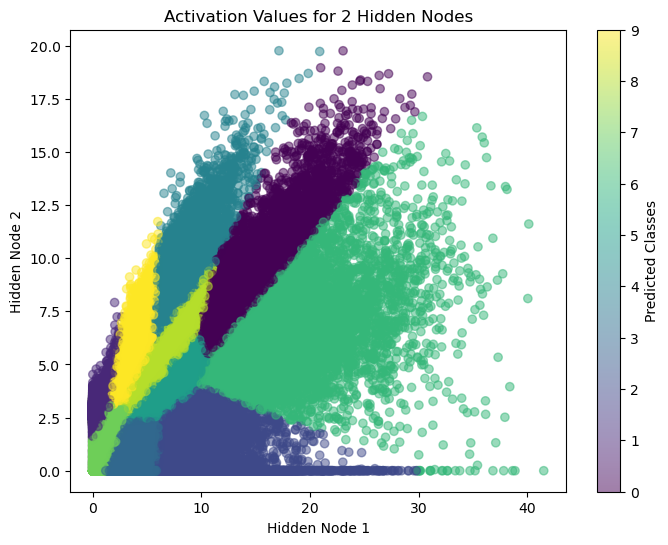

In [41]:
import tensorflow as tf

activation_model2 = tf.keras.models.Model(inputs=model2.input, outputs= model2.layers[0].output)
hidden = activation_model2(train_images)

predicted_classes2 = model2.predict(train_images).argmax(axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(hidden[:, 0], hidden[:, 1], c=predicted_classes2, cmap='viridis', alpha=0.5)
plt.xlabel('Hidden Node 1')
plt.ylabel('Hidden Node 2')
plt.title('Activation Values for 2 Hidden Nodes')
plt.colorbar(label='Predicted Classes')
plt.show()

In [39]:
y_pred = model2.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step
[[ 576    0   18    7    7  133  216    1   22    0]
 [   0 1022    6   11    0    2    0   54    8   32]
 [   9    2  629  243    5   67   31   21   18    7]
 [   0    4  171  631    1   62    4  120   13    4]
 [  20    7    4    1  552    8    6    7   83  294]
 [  75    0   82  108   22  350   25   32  188   10]
 [ 106    1   52    0    3   34  743    1   15    3]
 [   0   43    1   45    5    9    0  858   24   43]
 [ 131    5   19   40   38  201   14   40  438   48]
 [  10   45    3    5  115    8    1   92   65  665]]


In [40]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0959 - accuracy: 0.6464
Test accuracy: 0.646399974822998


Experiment 3

In [109]:
model3 = Sequential()
model3.add(Dense(784, input_shape=(784,), activation='relu'))
model3.add(Dense(5, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4588 - accuracy: 0.8609 - val_loss: 0.1623 - val_accuracy: 0.9580
Epoch 2/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1407 - accuracy: 0.9616 - val_loss: 0.1172 - val_accuracy: 0.9708
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0911 - accuracy: 0.9737 - val_loss: 0.1027 - val_accuracy: 0.9730
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0626 - accuracy: 0.9812 - val_loss: 0.0958 - val_accuracy: 0.9753
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.1164 - val_accuracy: 0.9738
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.1162 - val_accuracy: 0.9743
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.1246 - val_accuracy

In [110]:
y_pred = model3.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step
[[ 970    1    0    0    0    0    4    1    3    1]
 [   0 1126    3    1    0    1    1    0    3    0]
 [   1    5  995    9    1    0    2   10    9    0]
 [   0    0    4  976    1    7    0    5   16    1]
 [   2    1    4    0  950    1    3    1    0   20]
 [   2    0    1    4    1  861    2    1   19    1]
 [   4    3    2    0    3    1  938    0    7    0]
 [   1    1    5    5    0    0    0 1007    4    5]
 [   3    2    1    3    1    9    0    2  951    2]
 [   3    2    2    0    7    0    0    5   10  980]]


In [111]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9754
Test accuracy: 0.9753999710083008


In [112]:
model4 = Sequential()
model4.add(Dense(784, input_shape=(784,), activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model4.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1984 - accuracy: 0.9396 - val_loss: 0.1031 - val_accuracy: 0.9697
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0811 - accuracy: 0.9745 - val_loss: 0.0884 - val_accuracy: 0.9715
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0555 - accuracy: 0.9825 - val_loss: 0.0797 - val_accuracy: 0.9772
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.0740 - val_accuracy: 0.9795
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0763 - val_accuracy: 0.9815
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0817 - val_accuracy: 0.9793
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0914 - val_acc

In [113]:
y_pred = model4.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step
[[ 966    1    0    1    0    0    9    0    2    1]
 [   0 1124    2    1    0    0    2    0    6    0]
 [   5    0  986    8    4    0   12    6   11    0]
 [   0    0    2  991    0    3    0    5    5    4]
 [   2    0    1    1  959    0    6    0    1   12]
 [   2    0    0   10    1  860   10    0    7    2]
 [   1    2    0    1    1    1  949    0    3    0]
 [   1    0    6    2    2    0    1 1006    4    6]
 [   0    1    1    2    1    2    3    3  958    3]
 [   1    3    0    2    5    3    2    1    1  991]]


In [114]:
test_loss, test_acc = model4.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.9790
Test accuracy: 0.9789999723434448


In [115]:
model5 = Sequential()
model5.add(Dense(784, input_shape=(784,), activation='relu'))
model5.add(Dense(50, activation='relu'))
model5.add(Dense(10, activation='softmax'))

# Compile the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model5.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2021 - accuracy: 0.9386 - val_loss: 0.0959 - val_accuracy: 0.9703
Epoch 2/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0834 - accuracy: 0.9739 - val_loss: 0.0774 - val_accuracy: 0.9793
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0565 - accuracy: 0.9815 - val_loss: 0.1028 - val_accuracy: 0.9720
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0875 - val_accuracy: 0.9747
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0764 - val_accuracy: 0.9818
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0839 - val_accuracy: 0.9793
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0914 - val_accu

In [116]:
y_pred = model5.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step
[[ 972    1    0    1    2    1    2    0    0    1]
 [   1 1130    3    0    0    0    0    0    1    0]
 [   0    0 1019    2    2    0    2    5    2    0]
 [   0    0    5  999    0    3    0    1    2    0]
 [   0    1    6    0  964    0    4    1    0    6]
 [   2    0    0   20    1  862    3    0    2    2]
 [   2    4    0    1    7    1  943    0    0    0]
 [   2    8    9    1    1    0    1  999    3    4]
 [   8    5    6   11    4    5    4    3  923    5]
 [   3    4    1    9   22    2    0    2    2  964]]


In [117]:
test_loss, test_acc = model5.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9775
Test accuracy: 0.9775000214576721


Model 4 with 128 hidden nodes has the highest test accuracy, so we will move forward with this one.

Experiment 4

Number of components to explain 95% of the variance: 154
Explained variance ratio: 0.95212907


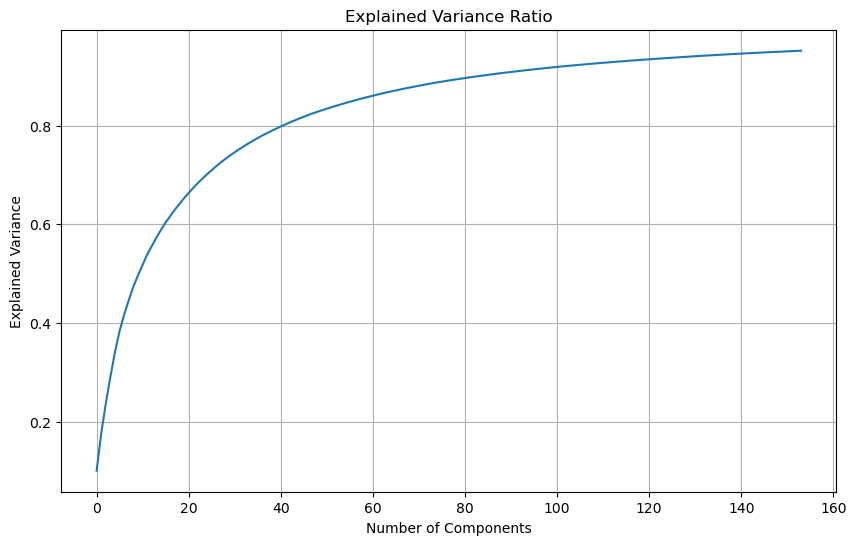

In [43]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=154)
train_images_pca = pca.fit_transform(train_images)
test_images_pca = pca.fit_transform(test_images)

# Number of components
print("Number of components to explain 95% of the variance:", pca.n_components_)

# Explained variance ratio
print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [44]:
model154 = Sequential()
model154.add(Dense(154, input_shape=(154,), activation='relu'))
model154.add(Dense(128, activation='relu'))
model154.add(Dense(10, activation='softmax'))

# Compile the model
model154.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model154.fit(train_images_pca, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2446 - accuracy: 0.9295 - val_loss: 0.1001 - val_accuracy: 0.9723
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0885 - accuracy: 0.9729 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0805 - val_accuracy: 0.9753
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.0702 - val_accuracy: 0.9795
Epoch 5/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0805 - val_accuracy: 0.9782
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0833 - val_accuracy: 0.9793
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.1011 - val_accuracy:

In [45]:
test_images_pca.shape

(10000, 154)

In [46]:
y_pred = model154.predict(test_images_pca)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 3ms/step
[[585   2  78   5  18  20  57 181  17  17]
 [  0  16   7   9  23  58  57 651   7 307]
 [ 29   3 213   9 119  20 365 118 113  43]
 [  6   9   4  88  60 202  13 162 133 333]
 [ 18   8 206 251  19  63  61  17 313  26]
 [ 61   1  23 117  44 155  17 186  78 210]
 [ 85   1 529   2  35   5 128 119  45   9]
 [ 29  52 142 130   2 347  52  19 170  85]
 [ 13   6  77 238  36 145  11 142  84 222]
 [ 26  10  89 533   4  67  40  16 194  30]]


In [47]:
test_loss, test_acc = model154.evaluate(test_images_pca, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 13.6795 - accuracy: 0.1337
Test accuracy: 0.13369999825954437


Experiment 5

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_images, train_labels)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort the feature importances and get the indices of the top 70 pixels
top_70_indices = np.argsort(feature_importances)[::-1][:70]

In [131]:
train_images.shape

(60000, 784)

In [132]:
train_images_top70 = train_images[:,top_70_indices]
test_images_top70 = test_images[:,top_70_indices]

In [140]:
model70 = Sequential()
model70.add(Dense(70, input_shape=(70,), activation='relu'))
model70.add(Dense(128, activation='relu'))
model70.add(Dense(10, activation='softmax'))

# Compile the model
model70.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model70.fit(train_images_top70, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.5464 - accuracy: 0.8340 - val_loss: 0.3015 - val_accuracy: 0.9052
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3332 - accuracy: 0.8977 - val_loss: 0.2649 - val_accuracy: 0.9182
Epoch 3/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2743 - accuracy: 0.9151 - val_loss: 0.2283 - val_accuracy: 0.9308
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2443 - accuracy: 0.9234 - val_loss: 0.1935 - val_accuracy: 0.9425
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2234 - accuracy: 0.9305 - val_loss: 0.1948 - val_accuracy: 0.9407
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2054 - accuracy: 0.9345 - val_loss: 0.1892 - val_accuracy: 0.9437
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1921 - accuracy: 0.9392 - val_loss: 0.1912 - val_accuracy:

In [141]:
y_pred = model70.predict(test_images_top70)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 0s 824us/step
[[ 954    1    0    2    0    5   11    5    1    1]
 [   1 1120    3    4    0    2    3    2    0    0]
 [   1    4  916   21    7   11   17   42   10    3]
 [   4    0    5  928    2   42    1   11    8    9]
 [   2    2    2    3  923    0   24    3    4   19]
 [   9    4    3   32    8  804   21    1    6    4]
 [  15    4    0    0    2    6  929    0    2    0]
 [   0    4   18    7    3    0    3  984    2    7]
 [   5    0    7   16    8   16   16    6  889   11]
 [   4    2    1   10   27   13    6   12    9  925]]


In [142]:
test_loss, test_acc = model70.evaluate(test_images_top70, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 934us/step - loss: 0.2101 - accuracy: 0.9372
Test accuracy: 0.9372000098228455
